<a href="https://colab.research.google.com/github/Harsha92/Insaid-Telecom-Services/blob/main/Insaid_Telecom_Services.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

InsaidTelecom, one of the leading telecom players, understands that customizing offering
is very important for its business to stay competitive.
Currently, InsaidTelecom is seeking to leverage behavioral data from more than 60% of the 50 million mobile devices active daily in India
to help its clients better understand and interact with their audiences.

In this consulting assignment, Insaidians are expected to build a dashboard to understand
user's demographic characteristics based on their mobile usage, geolocation, and mobile device properties.
Doing so will help millions of developers and brand advertisers around the world pursue
data-driven marketing efforts which are relevant to their users and catered to their preferences.

## Installing required packages

In [38]:
!pip install pymysql

In [39]:
!pip install googletrans

In [40]:
!pip install google_trans_new

In [41]:
!pip install googletrans

In [42]:
!pip install google-cloud-translate

In [43]:
!pip install mysql.connector

Processing /root/.cache/pip/wheels/8c/83/a1/f8b6d4bb1bd6208bbde1608bbfa7557504bed9eaf2ecf8c175/mysql_connector-2.2.9-cp37-cp37m-linux_x86_64.whl


In [44]:
!pip install PyDrive

In [45]:
!pip install folium

## Importing required packages

In [46]:
import seaborn
import numpy as np
import pandas as pd  # Importing package pandas (For Panel Data Analysis)
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport  # Import Pandas Profiling (To generate Univariate Analysis)
#-------------------------------------------------------------------------------------------------------------------------------
# allow plots to appear directly in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = 8, 6

import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

from google_trans_new import google_translator  
from googletrans import Translator
#-------------------------------------------------------------------------------------------------------------------------------
# Importing sql connector
import mysql.connector
import pymysql

from google.colab import files

import os


## Loading Data

In [47]:
events_data = pd.read_csv('https://media.githubusercontent.com/media/Harsha92/Insaid-Telecom-Services/main/events_data.csv')


In [48]:
events_data.head()

,event_id,device_id,timestamp,longitude,latitude,city,state
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal
2,605968,-3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand


In [49]:
events_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   event_id   int64  
 1   device_id  float64
 2   timestamp  object 
 3   longitude  float64
 4   latitude   float64
 5   city       object 
 6   state      object 
dtypes: float64(3), int64(1), object(3)
memory usage: 173.7+ MB


In [50]:
events_data.state.unique()   # Finding the unique categories of state column

array(['Delhi', 'WestBengal', 'TamilNadu', 'Jharkhand', 'AndhraPradesh',
       'Maharashtra', 'Gujarat', 'Kerala', 'MadhyaPradesh', 'Karnataka',
       'Rajasthan', 'Orissa', 'Punjab', 'UttarPradesh', 'Nagaland',
       'Haryana', 'Telangana', 'Chhattisgarh', 'Bihar', 'JammuandKashmir',
       'Assam', 'Goa', 'Mizoram', 'Tripura', 'Uttaranchal', nan,
       'Pondicherry', 'Manipur', 'Meghalaya', 'ArunachalPradesh',
       'HimachalPradesh', 'Chandigarh', 'AndamanandNicobarIslands'],
      dtype=object)

In [51]:
# Extracting the data for Delhi state

events_data_delhi = events_data.loc[events_data.state == 'Delhi', :]

In [52]:
events_data_delhi.head()

,event_id,device_id,timestamp,longitude,latitude,city,state
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi
2,605968,-3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi
8,2309828,3.020769e+18,2016-05-04 09:24:50,77.263922,28.757914,Delhi,Delhi
13,2633127,-3.090167e+18,2016-05-05 04:42:59,77.285920,28.758381,Delhi,Delhi
17,2224400,7.566051e+18,2016-05-01 00:07:47,77.240478,28.715664,Delhi,Delhi


In [53]:
events_data_delhi.state.unique()  # This confirms we have data only for Delhi state

array(['Delhi'], dtype=object)

In [54]:
events_data_delhi.city.unique()

array(['Delhi', 'SultanpurMajra', 'Deoli', 'NiDilli', 'RoshanPura',
       'BhalswaJahangirpur', 'Gokalpur', 'Tigri', 'DilliCantonment',
       'NangloiJat'], dtype=object)

In [55]:
events_data_delhi.info()  # There is smome missing information in few columns 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 751733 entries, 0 to 3252947
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   event_id   751733 non-null  int64  
 1   device_id  751664 non-null  float64
 2   timestamp  751733 non-null  object 
 3   longitude  751670 non-null  float64
 4   latitude   751670 non-null  float64
 5   city       751733 non-null  object 
 6   state      751733 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 45.9+ MB


In [56]:
# Connecting to mysql database

mydb = pymysql.connect(host='cpanel.insaid.co', user='student', passwd='student', 
                                                          database='Capstone1')

In [57]:
mydb

In [58]:
gender_age_train = pd.read_sql(sql='SELECT * FROM gender_age_train', con=mydb)

In [59]:
gender_age_train.head()

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [60]:
gender_age_train.info()  # There is no missing information in gender_age_train dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   device_id  74645 non-null  int64 
 1   gender     74645 non-null  object
 2   age        74645 non-null  int64 
 3   group      74645 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [61]:
# Renaming columns in gender_age_train dataframe

gender_age_train.rename(columns={0:'device_id', 1:'gender', 2:'age', 3:'age_group'}, 
                                        inplace=True)
gender_age_train.head()

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [62]:
# Connecting to mysql database

mydb = mysql.connector.connect(host='cpanel.insaid.co', user='student', passwd='student', 
                                                          database='Capstone1')

In [63]:
# Creating the cursor to point each instance of the database

my_cursor = mydb.cursor()

In [64]:
# Fetching all the data from phone_brand_device_model table using cursor object

my_cursor.execute('select * from phone_brand_device_model')

In [65]:
# Store the data available in cursor object in phone_brand_device_model variable

phone_brand_device_model = my_cursor.fetchall()

In [66]:
# Converting phone_brand_device_model variable into a Dataframe

phone_brand_device_model = pd.DataFrame(phone_brand_device_model)

In [67]:
phone_brand_device_model.head()

,0,1,2
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2


In [68]:
phone_brand_device_model.info()  # There is no missing information in phone_brand_device_model

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       87726 non-null  int64 
 1   1       87726 non-null  object
 2   2       87726 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [69]:
# Renaming columns in phone_brand_device_model dataframe

phone_brand_device_model.rename(columns={0:'device_id', 1:'phone_brand', 2:'device_model'}, 
                                        inplace=True)
phone_brand_device_model.head()

,device_id,phone_brand,device_model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2


In [70]:
phone_brand_device_model.phone_brand.unique()

array(['vivo', '小米', 'OPPO', '三星', '酷派', '联想 ', '华为', '奇酷', '魅族', '斐讯',
       '中国移动', 'HTC', '天语', '至尊宝', 'LG', '欧博信', '优米', 'ZUK', '努比亚', '惠普',
       '尼比鲁', '美图', '乡米', '摩托罗拉', '梦米', '锤子', '富可视', '乐视', '海信', '百立丰',
       '一加', '语信', '海尔', '酷比', '纽曼', '波导', '朵唯', '聆韵', 'TCL', '酷珀', '爱派尔',
       'LOGO', '青葱', '果米', '华硕', '昂达', '艾优尼', '康佳', '优购', '邦华', '赛博宇华',
       '黑米', 'Lovme', '先锋', 'E派', '神舟', '诺基亚', '普耐尔', '糖葫芦', '亿通', '欧新',
       '米奇', '酷比魔方', '蓝魔', '小杨树', '贝尔丰', '糯米', '米歌', 'E人E本', '西米', '大Q',
       '台电', '飞利浦', '唯米', '大显', '长虹', '维图', '青橙', '本为', '虾米', '夏新', '帷幄',
       '百加', 'SUGAR', '欧奇', '世纪星', '智镁', '欧比', '基伍', '飞秒', '德赛', '易派',
       '谷歌', '金星数码', '广信', '诺亚信', 'MIL', '白米', '大可乐', '宝捷讯', '优语', '首云',
       '瑞米', '瑞高', '沃普丰', '摩乐', '鲜米', '凯利通', '唯比', '欧沃', '丰米', '恒宇丰',
       '奥克斯', '西门子', '欧乐迪', 'PPTV'], dtype=object)

In [71]:
translator = google_translator()

In [72]:
phone_brand = phone_brand_device_model.phone_brand.to_list()

In [73]:
phone_brand_device_model_copy = phone_brand_device_model


## Working on events_data_delhi

In [74]:
events_data_delhi.head()

,event_id,device_id,timestamp,longitude,latitude,city,state
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi
2,605968,-3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi
8,2309828,3.020769e+18,2016-05-04 09:24:50,77.263922,28.757914,Delhi,Delhi
13,2633127,-3.090167e+18,2016-05-05 04:42:59,77.285920,28.758381,Delhi,Delhi
17,2224400,7.566051e+18,2016-05-01 00:07:47,77.240478,28.715664,Delhi,Delhi


In [75]:
events_data_delhi.isnull().sum()

event_id      0
device_id    69
timestamp     0
longitude    63
latitude     63
city          0
state         0
dtype: int64

In [76]:
# Finding records with missing information for latitude and longitude feature

events_data_delhi.loc[(events_data_delhi.longitude.isnull()) & (events_data_delhi.longitude.isnull()), :]

,event_id,device_id,timestamp,longitude,latitude,city,state
8015,2929521,1.779631e+18,2016-05-05 01:15:22,NaN,NaN,Delhi,Delhi
35009,1039863,5.375599e+18,2016-05-01 14:40:31,NaN,NaN,Delhi,Delhi
91559,2527074,5.375599e+18,2016-05-07 17:51:23,NaN,NaN,Delhi,Delhi
102308,2922517,1.779631e+18,2016-05-01 21:50:03,NaN,NaN,Delhi,Delhi
119754,2869070,4.782582e+18,2016-05-01 02:35:12,NaN,NaN,Delhi,Delhi
...,...,...,...,...,...,...,...
2851330,2505314,4.782582e+18,2016-05-03 03:32:06,NaN,NaN,Delhi,Delhi
2976687,3074833,5.375599e+18,2016-05-05 19:21:54,NaN,NaN,Delhi,Delhi
2993381,2350632,5.375599e+18,2016-05-07 18:01:34,NaN,NaN,Delhi,Delhi
2996499,2481118,4.782582e+18,2016-05-02 15:12:49,NaN,NaN,Delhi,Delhi


In [77]:
# Finding the missing values in remaining features

missing_data_columns = events_data_delhi.columns[events_data_delhi.isnull().sum() > 0]
print(missing_data_columns)

# Replacing the missing values with mean as all the above features are having continous data

for col in missing_data_columns.to_list():
    events_data_delhi[col] = events_data_delhi[col].fillna(events_data_delhi[col].mean())


Index(['device_id', 'longitude', 'latitude'], dtype='object')


In [78]:
events_data_delhi.isnull().sum()

event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
dtype: int64

In [79]:
events_data_delhi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 751733 entries, 0 to 3252947
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   event_id   751733 non-null  int64  
 1   device_id  751733 non-null  float64
 2   timestamp  751733 non-null  object 
 3   longitude  751733 non-null  float64
 4   latitude   751733 non-null  float64
 5   city       751733 non-null  object 
 6   state      751733 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 45.9+ MB


In [80]:
events_data_delhi.city.unique()

array(['Delhi', 'SultanpurMajra', 'Deoli', 'NiDilli', 'RoshanPura',
       'BhalswaJahangirpur', 'Gokalpur', 'Tigri', 'DilliCantonment',
       'NangloiJat'], dtype=object)

In [81]:
events_data_delhi.city.value_counts()

Delhi                 744212
BhalswaJahangirpur      1083
SultanpurMajra          1030
Deoli                   1022
DilliCantonment          930
Gokalpur                 927
Tigri                    832
RoshanPura               805
NangloiJat               523
NiDilli                  369
Name: city, dtype: int64

## Working on gender_age_train

In [82]:
gender_age_train.head()

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [83]:
gender_age_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   device_id  74645 non-null  int64 
 1   gender     74645 non-null  object
 2   age        74645 non-null  int64 
 3   group      74645 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [84]:
gender_age_train.isnull().sum()

device_id    0
gender       0
age          0
group        0
dtype: int64

gender_age_train dataset has no missing data

In [85]:
gender_age_train.group.unique()

array(['M32-38', 'M29-31', 'F24-26', 'F33-42', 'F27-28', 'M39+', 'M23-26',
       'M27-28', 'M22-', 'F43+', 'F23-', 'F29-32'], dtype=object)

Text(0.5, 1.0, 'Frequency of age Group')

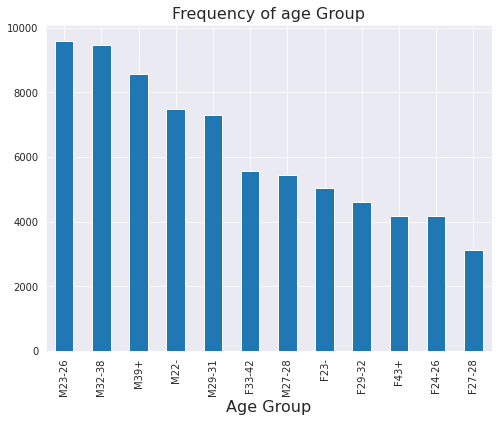

In [86]:
gender_age_train.group.value_counts().plot(kind='bar')
plt.xlabel('Age Group',  fontsize=16)
plt.title('Frequency of age Group', fontsize=16)

From the above visualization we can see that Males of Age group 23-36 followed by 32-38 are having highest frequency

## Working on phone_brand_device_model

In [87]:
phone_brand_device_model.head()

,device_id,phone_brand,device_model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2


In [88]:
phone_brand_device_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   device_id     87726 non-null  int64 
 1   phone_brand   87726 non-null  object
 2   device_model  87726 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [89]:
phone_brand_device_model.isnull().sum()

device_id       0
phone_brand     0
device_model    0
dtype: int64

There is no missing information in phone_brand_device_model data

In [90]:
translator_new = google_translator()
translator = Translator()

In [91]:
# Take a backup of phone_brand_device_model dataset

phone_brand_device_model_copy = phone_brand_device_model.copy()
print(phone_brand_device_model is phone_brand_device_model_copy)

False


In [92]:
phone_brand_device_model['phone_brand_english'] = \
  phone_brand_device_model['phone_brand'].map(lambda x: translator.translate(x, lang_tgt="en"))

AttributeError: ignored

In [94]:
phone_brand = pd.DataFrame(phone_brand_device_model.phone_brand.unique())
phone_brand.rename(columns={0: 'brand'}, inplace=True)
phone_brand

,brand
0,vivo
1,小米
2,OPPO
3,三星
4,酷派
...,...
111,恒宇丰
112,奥克斯
113,西门子
114,欧乐迪


In [95]:
translator_new.translate(phone_brand.brand, lang_tgt='en')

'0 Vivo  1 millet  2 OPPO  3 Samsung  4 cool  ...  111 Hengyufeng  112 Ox  113 Siemens  114 O Li Di  115 PPTV  Name: BRAND, Length: 116, DTYPE: Object '

In [96]:
for brand in phone_brand.brand.unique():
  print(brand, type(brand))

vivo <class 'str'>
小米 <class 'str'>
OPPO <class 'str'>
三星 <class 'str'>
酷派 <class 'str'>
联想  <class 'str'>
华为 <class 'str'>
奇酷 <class 'str'>
魅族 <class 'str'>
斐讯 <class 'str'>
中国移动 <class 'str'>
HTC <class 'str'>
天语 <class 'str'>
至尊宝 <class 'str'>
LG <class 'str'>
欧博信 <class 'str'>
优米 <class 'str'>
ZUK <class 'str'>
努比亚 <class 'str'>
惠普 <class 'str'>
尼比鲁 <class 'str'>
美图 <class 'str'>
乡米 <class 'str'>
摩托罗拉 <class 'str'>
梦米 <class 'str'>
锤子 <class 'str'>
富可视 <class 'str'>
乐视 <class 'str'>
海信 <class 'str'>
百立丰 <class 'str'>
一加 <class 'str'>
语信 <class 'str'>
海尔 <class 'str'>
酷比 <class 'str'>
纽曼 <class 'str'>
波导 <class 'str'>
朵唯 <class 'str'>
聆韵 <class 'str'>
TCL <class 'str'>
酷珀 <class 'str'>
爱派尔 <class 'str'>
LOGO <class 'str'>
青葱 <class 'str'>
果米 <class 'str'>
华硕 <class 'str'>
昂达 <class 'str'>
艾优尼 <class 'str'>
康佳 <class 'str'>
优购 <class 'str'>
邦华 <class 'str'>
赛博宇华 <class 'str'>
黑米 <class 'str'>
Lovme <class 'str'>
先锋 <class 'str'>
E派 <class 'str'>
神舟 <class 'str'>
诺基亚 <class 'str'>
普耐尔

In [97]:
phone_brand_device_model["brand_english"] = ""

for index, row in phone_brand_device_model.iterrows():
    translator = Translator()
    eng_text = translator.translate(row["phone_brand"], src="zh-TW", dest="en").text
    row["brand_english"] = eng_text

AttributeError: ignored

In [98]:
translations = set()
for column in phone_brand_device_model.columns:
    # unique elements of the column
    unique_elements = phone_brand_device_model[column].unique()
    for element in unique_elements:
        # add translation to the dictionary
        translations[element] = translator.translate(element).text
    
print(translations)

AttributeError: ignored

## Plotting maps with Folium